In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import string
from collections import defaultdict
import numpy as np

In [2]:
#loading the train and text datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#checking the data
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
#checking the data
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train.isnull().sum() ##keyword and location have null values

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
#checking count distribution
train['location'].value_counts()[:10]

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

In [8]:
#checking count distribution
train['keyword'].value_counts()[:10]

fatalities     45
armageddon     42
deluge         42
body%20bags    41
damage         41
sinking        41
harm           41
siren          40
fear           40
outbreak       40
Name: keyword, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

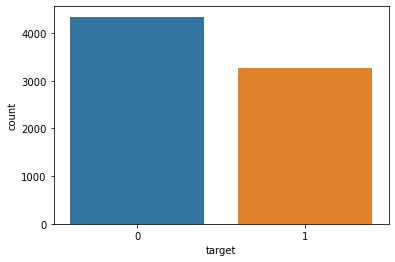

In [9]:
sns.countplot(x=train['target'], data=train) #counts based on target values

In [10]:
#function to check feature distribution based on target
def plot_feature_based_on_target(feature):
    x1 = train[train['target']== 1][feature]
    x2 = train[train['target']== 0][feature]
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1) 
    plt.hist(x1,color='blue',bins=50)
    plt.title('disaster distribution based on {}'.format(feature))
    plt.subplot(1,2,2)
    plt.hist(x2, color='orange',bins=50)
    plt.title('Not disaster distribution based on {} '.format(feature))

In [11]:
#creating new feature - length of texts
train['text_length'] = train['text'].map(lambda x:len(x))

In [12]:
#New feature added
train.head()

,id,keyword,location,text,target,text_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


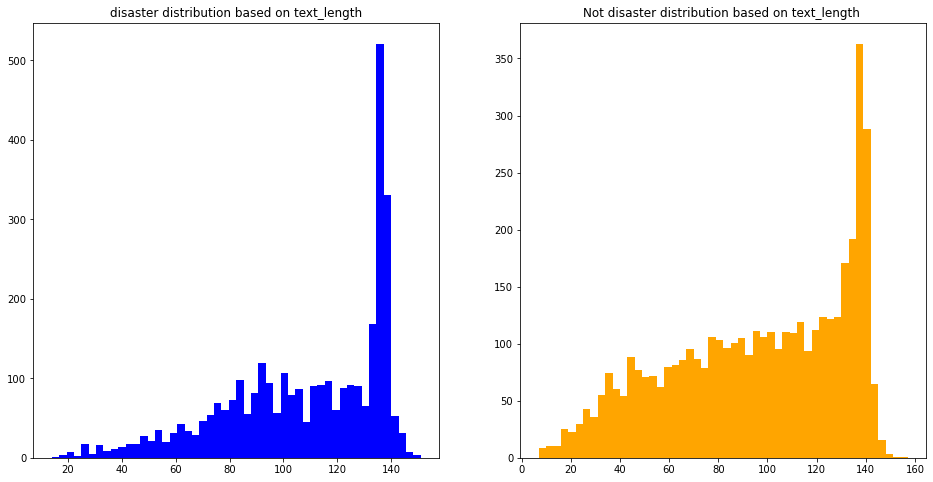

In [13]:
#distribution of text lengths based on target
plot_feature_based_on_target('text_length')

In [14]:
#new feature - word count
train['word_count']=train['text'].str.split(" ").map(lambda x: len(x))

In [15]:
train.head()

,id,keyword,location,text,target,text_length,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,17


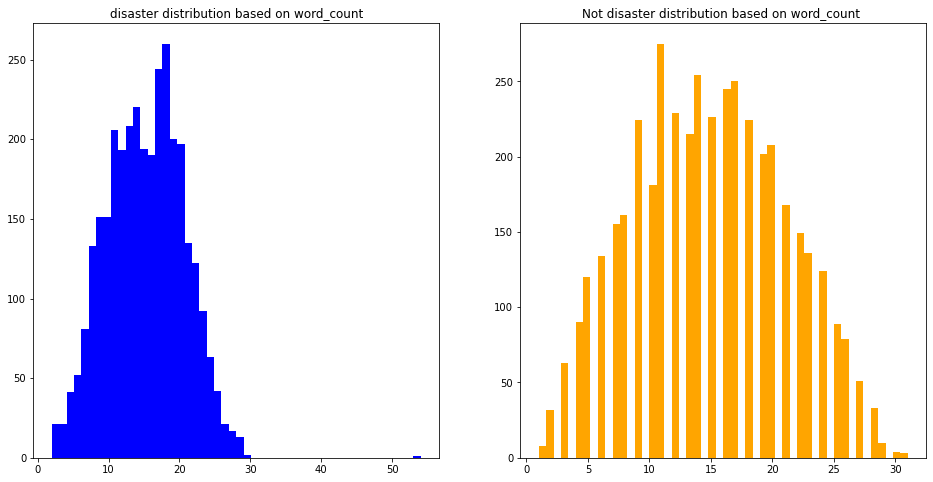

In [16]:
#distribution of word count based on target
plot_feature_based_on_target('word_count')

In [17]:
#new feature - unique word count
train['unique_word_count']=train['text'].str.split(" ").map(lambda x: len(set(x)))

In [18]:
train.head()

,id,keyword,location,text,target,text_length,word_count,unique_word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,20
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,17,16


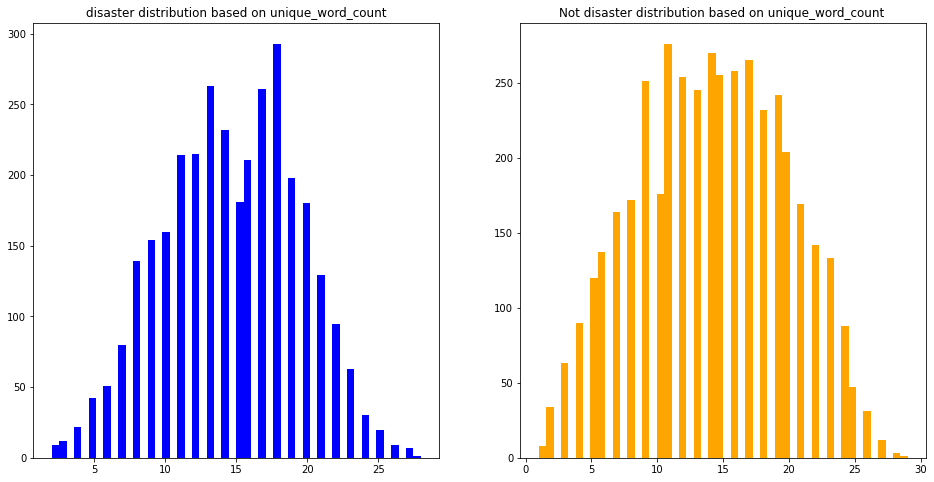

In [19]:
#distribution of unique word count based on target
plot_feature_based_on_target('unique_word_count')

In [20]:
#new feature - punctuation count
train['punctuation count'] = train['text'].map(lambda x:len([c for c in str(x) if c in string.punctuation]))

In [21]:
train.head()

,id,keyword,location,text,target,text_length,word_count,unique_word_count,punctuation count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,13,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,7,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,20,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,9,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,17,16,2


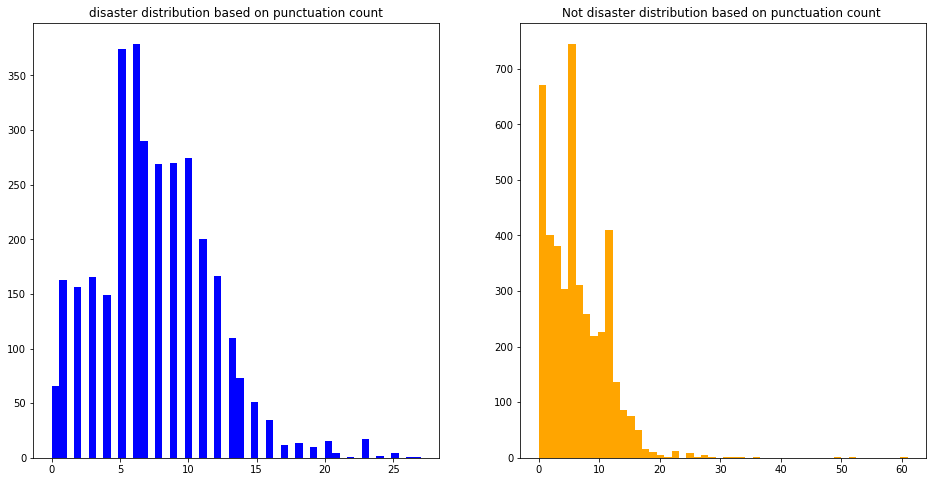

In [22]:
#distribution of punctuation count based on target
plot_feature_based_on_target('punctuation count')

In [23]:
#n-gram analysis
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hdeok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
#remove URLs and HTML

import re

def remove_URL(text):
    url = re.compile(r"https?://S+|www\.\S+")
    return url.sub(r"", text)

def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"",text)

In [25]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F300-\U0001F5FF"
        u"\U0001F600-\U0001F64F"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", 
        flags=re.UNICODE
    )
    return emoji_pattern.sub(r"",string)

In [26]:
#removing and URLs, html and emoji formats for train data
train['text_cleanup'] = train['text'].map(lambda x : remove_URL(x))
train['text_cleanup'] = train['text'].map(lambda x : remove_html(x))
train['text_cleanup'] = train['text'].map(lambda x : remove_emoji(x))

In [27]:
#removing and URLs, html and emoji formats for test data
test['text_cleanup'] = test['text'].map(lambda x : remove_URL(x))
test['text_cleanup'] = test['text'].map(lambda x : remove_html(x))
test['text_cleanup'] = test['text'].map(lambda x : remove_emoji(x))

In [28]:
# Funtion to Remove punctuation
def remove_punct(text):
    punct_text = [words for words in text if words not in string.punctuation ]
    words_wo_punct=''.join(punct_text)
    return words_wo_punct

In [29]:
train['text_with_no_punct'] = train['text_cleanup'].apply(lambda x: remove_punct(x))
test['text_with_no_punct'] = test['text_cleanup'].apply(lambda x: remove_punct(x))

In [30]:
#Current Dataframe - feature 'text_with_no_punct' added
train.head()

,id,keyword,location,text,target,text_length,word_count,unique_word_count,punctuation count,text_cleanup,text_with_no_punct
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,13,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,7,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,20,3,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,9,2,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,17,16,2,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...


# Word Tokenization

Word Tokenization - We will use word tokenization to break down our sentences into words(tokens) to feed our Vectorizer. It makes sense to predict if the sentence is a disaster tweet or not by proccessing the words in each sentence.

In [31]:
def tokenize_text(text):
    token = [ token for token in text.lower().split(" ")]
    return token

In [32]:
train['text_tokenize']=train['text_with_no_punct'].apply(lambda x: tokenize_text(x))
test['text_tokenize']=test['text_with_no_punct'].apply(lambda x: tokenize_text(x))

In [33]:
train.head()

,id,keyword,location,text,target,text_length,word_count,unique_word_count,punctuation count,text_cleanup,text_with_no_punct,text_tokenize
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,13,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,7,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,20,3,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,9,2,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,17,16,2,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


# Removing stopwords

Stopwords consist of irrelevant words which doesnt weight in the prediction, words like the,i,you are some examples. I will remove these words from the data as they are irrelevant

In [34]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

In [35]:
print(stop)

{'in', 'its', "needn't", 'o', 'did', 'more', 'does', 'nor', 'while', "it's", 'a', 'and', 'are', 'him', 'under', "won't", 'but', 'wasn', 'at', 'hadn', 'didn', "mustn't", 'same', "aren't", 'has', 'she', "you'd", 'haven', 'what', 'you', 'each', "that'll", 'above', 'just', "you're", 'the', 've', 'his', 'why', "don't", 'with', "shan't", "she's", 'off', "couldn't", 'no', 'most', 'doing', 'not', 'll', 'hers', 'both', 'here', 'i', 'don', 'below', 'so', 'yours', 'few', 'up', 'mustn', 'y', 'd', 'to', 'if', 'over', 'do', 'or', 'once', 'as', 'any', 'before', 're', "weren't", 'it', 'after', 'ours', 'your', 'yourselves', 'some', 's', 'all', 'into', 'needn', 'which', 'than', 'ourselves', 'by', 'whom', "you'll", 'himself', 'were', 'those', 'had', 'own', 'shan', 'they', 'we', 'been', 'isn', "wouldn't", 'wouldn', 'ain', 'itself', 'he', 'such', 'of', 'couldn', "hasn't", 'having', 'have', 'again', 'where', 'further', 'how', 'then', 'who', 'am', 'mightn', 'them', 'aren', 'only', 'hasn', 'doesn', "haven't",

As you can see it contains words that are frequently used , but dont hold much weight, and hence can be removed.

In [36]:
#Function to remove Stopwords
def remove_stopwords(text):
    text=[word for word in text if word not in stop]
    return text

In [37]:
train['text_without_stopwords'] = train['text_tokenize'].apply(lambda x : remove_stopwords(x))
test['text_without_stopwords'] = test['text_tokenize'].apply(lambda x : remove_stopwords(x))

In [38]:
#added feature - text_without_stopwords
train.head()

,id,keyword,location,text,target,text_length,word_count,unique_word_count,punctuation count,text_cleanup,text_with_no_punct,text_tokenize,text_without_stopwords
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,13,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,7,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,20,3,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,9,2,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,17,16,2,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [39]:
#converting latest feature to string (no stopwords in it)
def convert_to_str(text):
    text_str = ' '.join([word for word in text])
    return text_str

In [40]:
train['text_final']=train['text_without_stopwords'].apply(lambda x: convert_to_str(x))
test['text_final']=test['text_without_stopwords'].apply(lambda x: convert_to_str(x))

In [41]:
train.head(10)

,id,keyword,location,text,target,text_length,word_count,unique_word_count,punctuation count,text_cleanup,text_with_no_punct,text_tokenize,text_without_stopwords,text_final
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,13,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...",deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,7,1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,20,3,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...",residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,9,2,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...",13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,17,16,2,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfires pou...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110,18,18,7,#RockyFire Update => California Hwy. 20 closed...,RockyFire Update California Hwy 20 closed in ...,"[rockyfire, update, , california, hwy, 20, clo...","[rockyfire, update, , california, hwy, 20, clo...",rockyfire update california hwy 20 closed dir...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95,14,14,3,#flood #disaster Heavy rain causes flash flood...,flood disaster Heavy rain causes flash floodin...,"[flood, disaster, heavy, rain, causes, flash, ...","[flood, disaster, heavy, rain, causes, flash, ...",flood disaster heavy rain causes flash floodin...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59,15,14,4,I'm on top of the hill and I can see a fire in...,Im on top of the hill and I can see a fire in ...,"[im, on, top, of, the, hill, and, i, can, see,...","[im, top, hill, see, fire, woods]",im top hill see fire woods
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79,12,11,1,There's an emergency evacuation happening now ...,Theres an emergency evacuation happening now i...,"[theres, an, emergency, evacuation, happening,...","[theres, emergency, evacuation, happening, bui...",theres emergency evacuation happening building...
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52,10,10,4,I'm afraid that the tornado is coming to our a...,Im afraid that the tornado is coming to our area,"[im, afraid, that, the, tornado, is, coming, t...","[im, afraid, tornado, coming, area]",im afraid tornado coming area


# WordClouds

WordClouds are a good way to check the frequency of words that are present in the corpus. It is like a cloud with words of different sizes, bigger the size higher the frequncy of the word. I will use word clouds to check the frequency of words for target=1 and target=0

In [42]:
from wordcloud import WordCloud

train_true = train[train['target']==1]
train_text_1 = train_true['text_final']
train_false = train[train['target']==0]
train_text_0 = train_false['text_final']

In [43]:
#function to create a corpus from the text data
def create_corpus(corpus,data):
    for texts in data:
        for words in texts.split():
            corpus.append(words)

In [44]:
#creating corpuses based on target.
corpus_0 = []
corpus_1 = []

create_corpus(corpus_0,train_text_0)
create_corpus(corpus_1,train_text_1)

Text(0.5, 1.0, 'Wordcloud for target=1')

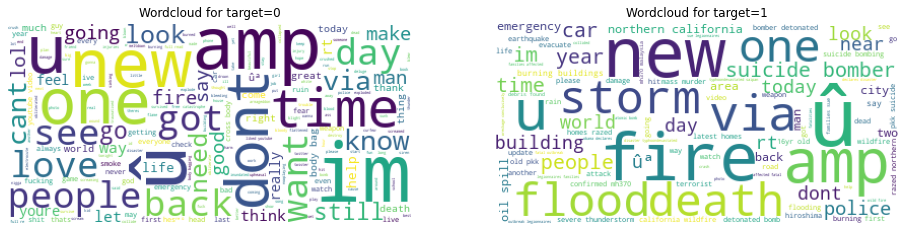

In [45]:
#creating the wordcloud and platting 
wordcloud0 = WordCloud(background_color='white',max_font_size=80).generate(" ".join(corpus_0))
wordcloud1 = WordCloud(background_color='white',max_font_size=80).generate(" ".join(corpus_1))

plt.figure(1,figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(wordcloud0)
plt.axis('off')
plt.title('Wordcloud for target=0')
plt.subplot(1,2,2)
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Wordcloud for target=1')

As you can see, for the non disaster corpus(target=0), words like new, im, dont are amoung high frequency words, While for the disaster corpus(target=1), words like fire, flood,storm are among the high frequency words which makes sense for a disaster. As you can see words like 'new' and 'amp' is present highly in both types of tweets, making me think it doesnt matter if we remove them from our corpus. It can be added to the list of stopwards if you want.

# Count Vectorizer

To do our predictions, we cannot input text data into our model and thus we use Count Vecorizer to convert the sentences into a vector of numbers. Here the length of the array will be the number of words in our corpus(vocabulary).

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))
train_cv = count_vectorizer.fit_transform(train['text_final'])
test_cv = count_vectorizer.transform(test["text_final"])

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(train_cv,train['target'],test_size=0.2,random_state=42)

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
y_pred = clf.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[808  66]
 [279 370]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       874
           1       0.85      0.57      0.68       649

    accuracy                           0.77      1523
   macro avg       0.80      0.75      0.75      1523
weighted avg       0.79      0.77      0.76      1523

0.7734734077478661


# Stemming

Stemming is the process of reducing the size of words into its root meaning without considering the context of the word . Check the example below for a better understanding. This helps in reducing the size of the corpus and not having similar kind of words as unique words in the corpus. It only removes the end of the word.

In [51]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem('program'))
print(stemmer.stem('programs'))
print(stemmer.stem('programming'))
print(stemmer.stem('programmer'))

program
program
program
programm


So as you can see for the above case the 4 words will be converted into only 2 words in our vocabulary and they have similar meanings. Over a large corpus , it will improve the speed of training our model.

In [52]:
#Using a stemmer to check if it imporves the accuracy
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming(text):
    text = [stemmer.stem(words) for words in text.split()]
    
    return " ".join(text)

In [53]:
train["text_stemmer"] = train["text_final"].map(stemming)
test["text_stemmer"] = test["text_final"].map(stemming)

In [54]:
#comparison between final cleaned text,and final text using a stemmer
train[['text_final','text_stemmer']][:10]

,text_final,text_stemmer
0,deeds reason earthquake may allah forgive us,deed reason earthquak may allah forgiv us
1,forest fire near la ronge sask canada,forest fire near la rong sask canada
2,residents asked shelter place notified officer...,resid ask shelter place notifi offic evacu she...
3,13000 people receive wildfires evacuation orde...,13000 peopl receiv wildfir evacu order california
4,got sent photo ruby alaska smoke wildfires pou...,got sent photo rubi alaska smoke wildfir pour ...
5,rockyfire update california hwy 20 closed dir...,rockyfir updat california hwi 20 close direct ...
6,flood disaster heavy rain causes flash floodin...,flood disast heavi rain caus flash flood stree...
7,im top hill see fire woods,im top hill see fire wood
8,theres emergency evacuation happening building...,there emerg evacu happen build across street
9,im afraid tornado coming area,im afraid tornado come area


In [55]:
#converting the corpus into vectors
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))
train_stemmer_cv = count_vectorizer.fit_transform(train['text_stemmer'])
test_stemmer_cv = count_vectorizer.transform(test["text_stemmer"])

In [56]:
X_train_1, X_test_1, y_train_1, y_test_1 =train_test_split(train_stemmer_cv,train['target'],test_size=0.2,random_state=42)

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf_1 = RandomForestClassifier()
clf_1.fit(X_train_1,y_train_1)

RandomForestClassifier()

In [58]:
y_pred_1 = clf_1.predict(X_test_1)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test_1,y_pred_1))
print(classification_report(y_test_1,y_pred_1))
print(accuracy_score(y_test_1, y_pred_1))

[[814  60]
 [267 382]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       874
           1       0.86      0.59      0.70       649

    accuracy                           0.79      1523
   macro avg       0.81      0.76      0.77      1523
weighted avg       0.80      0.79      0.78      1523

0.7852921864740644


In [60]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hdeok\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Lemmatizing

It is another method to reduce the word to its root form. Unlike a stemmer it does this considering the context of the word.

In [61]:
#using Lemmatizing instead of stemming to see how the performance is
from nltk.stem import WordNetLemmatizer
  
lemmatizer=nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    
    lemmatized_output = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return lemmatized_output

In [62]:
train['text_lemmatize']=train['text_final'].apply(lambda x: lemmatize_text(x))
test['text_lemmatize']=test['text_final'].apply(lambda x: lemmatize_text(x))

In [63]:
#comparison between final cleaned text, using a stemmer and using lemmatize
train[['text_final','text_stemmer','text_lemmatize']][:10]

,text_final,text_stemmer,text_lemmatize
0,deeds reason earthquake may allah forgive us,deed reason earthquak may allah forgiv us,deed reason earthquake may allah forgive u
1,forest fire near la ronge sask canada,forest fire near la rong sask canada,forest fire near la ronge sask canada
2,residents asked shelter place notified officer...,resid ask shelter place notifi offic evacu she...,resident asked shelter place notified officer ...
3,13000 people receive wildfires evacuation orde...,13000 peopl receiv wildfir evacu order california,13000 people receive wildfire evacuation order...
4,got sent photo ruby alaska smoke wildfires pou...,got sent photo rubi alaska smoke wildfir pour ...,got sent photo ruby alaska smoke wildfire pour...
5,rockyfire update california hwy 20 closed dir...,rockyfir updat california hwi 20 close direct ...,rockyfire update california hwy 20 closed dire...
6,flood disaster heavy rain causes flash floodin...,flood disast heavi rain caus flash flood stree...,flood disaster heavy rain cause flash flooding...
7,im top hill see fire woods,im top hill see fire wood,im top hill see fire wood
8,theres emergency evacuation happening building...,there emerg evacu happen build across street,there emergency evacuation happening building ...
9,im afraid tornado coming area,im afraid tornado come area,im afraid tornado coming area


In [64]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))
train_lemmatize_cv = count_vectorizer.fit_transform(train['text_lemmatize'])
test_lemmatize_cv = count_vectorizer.transform(test["text_lemmatize"])

In [65]:
X_train_2, X_test_2, y_train_2, y_test_2 =train_test_split(train_lemmatize_cv,train['target'],test_size=0.2,random_state=42)

In [66]:
from sklearn.ensemble import RandomForestClassifier

clf_2 = RandomForestClassifier()
clf_2.fit(X_train_2,y_train_2)

RandomForestClassifier()

In [67]:
y_pred_2 = clf_2.predict(X_test_2)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test_2,y_pred_2))
print(classification_report(y_test_2,y_pred_2))
print(accuracy_score(y_test_2, y_pred_2))

[[808  66]
 [266 383]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       874
           1       0.85      0.59      0.70       649

    accuracy                           0.78      1523
   macro avg       0.80      0.76      0.76      1523
weighted avg       0.80      0.78      0.77      1523

0.7820091923834537


In [69]:
#Prediciting the target for our test set
test.head()

,id,keyword,location,text,text_cleanup,text_with_no_punct,text_tokenize,text_without_stopwords,text_final,text_stemmer,text_lemmatize
0,0,NaN,NaN,Just happened a terrible car crash,Just happened a terrible car crash,Just happened a terrible car crash,"[just, happened, a, terrible, car, crash]","[happened, terrible, car, crash]",happened terrible car crash,happen terribl car crash,happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","Heard about #earthquake is different cities, s...",Heard about earthquake is different cities sta...,"[heard, about, earthquake, is, different, citi...","[heard, earthquake, different, cities, stay, s...",heard earthquake different cities stay safe ev...,heard earthquak differ citi stay safe everyon,heard earthquake different city stay safe ever...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...,"[there, is, a, forest, fire, at, spot, pond, g...","[forest, fire, spot, pond, geese, fleeing, acr...",forest fire spot pond geese fleeing across str...,forest fire spot pond gees flee across street ...,forest fire spot pond goose fleeing across str...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting Spokane wildfires,"[apocalypse, lighting, spokane, wildfires]","[apocalypse, lighting, spokane, wildfires]",apocalypse lighting spokane wildfires,apocalyps light spokan wildfir,apocalypse lighting spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills 28 in China and Taiwan,"[typhoon, soudelor, kills, 28, in, china, and,...","[typhoon, soudelor, kills, 28, china, taiwan]",typhoon soudelor kills 28 china taiwan,typhoon soudelor kill 28 china taiwan,typhoon soudelor kill 28 china taiwan


In [70]:
y_pred = clf.predict(test_cv)

In [71]:
test['y_pred_final_text'] = y_pred

In [72]:
output = test[['text_final','y_pred_final_text']]
output.head(5)

,text_final,y_pred_final_text
0,happened terrible car crash,0
1,heard earthquake different cities stay safe ev...,1
2,forest fire spot pond geese fleeing across str...,1
3,apocalypse lighting spokane wildfires,0
4,typhoon soudelor kills 28 china taiwan,1


In [73]:
val = np.random.randint(output.shape[0])
output[output.index==val]    

,text_final,y_pred_final_text
1777,diablo dsp olap world pres httptcolfetnrxywt r...,1
